In [1]:
import pandas as pd
import numpy as np
import graphviz
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('O2C Activities.csv', sep=';')
df

,_CASE_KEY,ACTIVITY_EN,EVENTTIME,ACTIVITY_DETAIL_EN,_SORTING,USER_NAME,USER_TYPE,CHANGED_TABLE,CHANGED_FIELD,CHANGED_FROM,CHANGED_TO,CHANGE_NUMBER,TRANSACTION_CODE
0,181743,Create Delivery,30.01.2009 10:16,NaN,NaN,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN
1,253499,Create Delivery,27.02.2009 03:33,NaN,NaN,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN
2,628324,Create Delivery,13.07.2009 03:39,NaN,NaN,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN
3,502214,Create Delivery,07.05.2009 03:39,NaN,NaN,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN
4,933370,Create Delivery,29.10.2009 10:18,NaN,NaN,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
483059,921309,Create Delivery,26.10.2009 09:18,NaN,NaN,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN
483060,775200,Create Delivery,24.09.2009 08:16,NaN,NaN,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN
483061,959593,Create Delivery,23.11.2009 03:33,NaN,NaN,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN
483062,588450,Create Delivery,26.06.2009 14:17,NaN,NaN,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483064 entries, 0 to 483063
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   _CASE_KEY           483064 non-null  int64  
 1   ACTIVITY_EN         483064 non-null  object 
 2   EVENTTIME           483064 non-null  object 
 3   ACTIVITY_DETAIL_EN  0 non-null       float64
 4   _SORTING            342544 non-null  float64
 5   USER_NAME           0 non-null       float64
 6   USER_TYPE           483064 non-null  object 
 7   CHANGED_TABLE       0 non-null       float64
 8   CHANGED_FIELD       0 non-null       float64
 9   CHANGED_FROM        398779 non-null  float64
 10  CHANGED_TO          398779 non-null  float64
 11  CHANGE_NUMBER       0 non-null       float64
 12  TRANSACTION_CODE    0 non-null       float64
dtypes: float64(9), int64(1), object(3)
memory usage: 47.9+ MB


In [4]:
df_node = df.copy()
df_node = df_node[['_CASE_KEY','ACTIVITY_EN','EVENTTIME','USER_TYPE']]
df_node['EVENTTIME'] = pd.to_datetime(df_node['EVENTTIME'], dayfirst=True)
df_node = df_node.sort_values(by=['_CASE_KEY','EVENTTIME'], ascending=True).reset_index(drop=True)
df_node

,_CASE_KEY,ACTIVITY_EN,EVENTTIME,USER_TYPE
0,140449,Create Sales Order Item,2009-01-02 03:10:00,B
1,140449,Create Delivery,2009-01-02 03:30:00,B
2,140449,Goods Issue,2009-01-02 04:30:00,B
3,140449,Create Invoice,2009-01-02 11:07:00,B
4,140483,Create Delivery,2009-01-02 07:15:00,B
...,...,...,...,...
483059,1166915,Credit Check Release,2010-02-01 09:26:00,A
483060,1166924,Create Sales Order Item,2010-01-31 16:50:00,A
483061,1166924,Credit Check Release,2010-02-01 09:26:00,A
483062,1166924,Remove Reason for rejection,2010-02-01 09:26:00,A


In [5]:
df_extract = df_node.copy()
df_extract['YEAR'] = df_extract['EVENTTIME'].dt.year
df_extract['COUNT'] = df_extract.groupby('_CASE_KEY').cumcount()+1
df_extract

,_CASE_KEY,ACTIVITY_EN,EVENTTIME,USER_TYPE,YEAR,COUNT
0,140449,Create Sales Order Item,2009-01-02 03:10:00,B,2009,1
1,140449,Create Delivery,2009-01-02 03:30:00,B,2009,2
2,140449,Goods Issue,2009-01-02 04:30:00,B,2009,3
3,140449,Create Invoice,2009-01-02 11:07:00,B,2009,4
4,140483,Create Delivery,2009-01-02 07:15:00,B,2009,1
...,...,...,...,...,...,...
483059,1166915,Credit Check Release,2010-02-01 09:26:00,A,2010,3
483060,1166924,Create Sales Order Item,2010-01-31 16:50:00,A,2010,1
483061,1166924,Credit Check Release,2010-02-01 09:26:00,A,2010,2
483062,1166924,Remove Reason for rejection,2010-02-01 09:26:00,A,2010,3


In [6]:
df_extract['YEAR'].value_counts()

2009    438048
2010     43698
2008      1308
2007        10
Name: YEAR, dtype: int64

In [7]:
assss = df_extract.copy()
assss['new_hgh'] = assss.apply(lambda x: "True" if (x['YEAR'] == 2009) & (x['COUNT'] == 1) else "False",axis=1)
assss_new = assss[assss['new_hgh'] == "True"].reset_index(drop=True)

assss_new_copy = assss_new.copy()
assss_new_copy = assss_new_copy[['_CASE_KEY','new_hgh']]
# assss_new_copy

assss = assss.drop(['new_hgh'], axis=1)
assss = assss.merge(assss_new_copy, on="_CASE_KEY", how='left')
assss = assss[assss['new_hgh'] == "True"].reset_index(drop=True)
# assss
assss

,_CASE_KEY,ACTIVITY_EN,EVENTTIME,USER_TYPE,YEAR,COUNT,new_hgh
0,140449,Create Sales Order Item,2009-01-02 03:10:00,B,2009,1,True
1,140449,Create Delivery,2009-01-02 03:30:00,B,2009,2,True
2,140449,Goods Issue,2009-01-02 04:30:00,B,2009,3,True
3,140449,Create Invoice,2009-01-02 11:07:00,B,2009,4,True
4,140483,Create Delivery,2009-01-02 07:15:00,B,2009,1,True
...,...,...,...,...,...,...,...
438778,1166306,Create Delivery,2010-01-29 14:17:00,B,2010,2,True
438779,1166306,Create Sales Order Item,2010-01-29 15:00:00,B,2010,3,True
438780,1166306,Goods Issue,2010-01-29 15:17:00,B,2010,4,True
438781,1166306,Create Invoice,2010-01-30 02:14:00,B,2010,5,True


In [8]:
# Variants
variants = assss.copy()
variants['Count'] = variants.groupby('_CASE_KEY').cumcount()+1
variants = variants.pivot(index='_CASE_KEY', columns='Count', values='ACTIVITY_EN')
variants_col = variants.columns
variants = variants.fillna('X')
variants = variants.astype('str')
variants['Trace'] = variants.apply(lambda x: ','.join(x),axis=1)
variants['Trace'] = variants['Trace'].apply(lambda x: x.replace(',X',''))
variants

Count,1,2,3,4,5,6,7,8,9,10,...,228,229,230,231,232,233,234,235,236,Trace
_CASE_KEY,,,,,,,,,,,,,,,,,,,,,
140449,Create Sales Order Item,Create Delivery,Goods Issue,Create Invoice,X,X,X,X,X,X,...,X,X,X,X,X,X,X,X,X,"Create Sales Order Item,Create Delivery,Goods ..."
140483,Create Delivery,Create Sales Order Item,Goods Issue,Create Invoice,X,X,X,X,X,X,...,X,X,X,X,X,X,X,X,X,"Create Delivery,Create Sales Order Item,Goods ..."
140499,Create Delivery,Create Sales Order Item,Goods Issue,Create Invoice,X,X,X,X,X,X,...,X,X,X,X,X,X,X,X,X,"Create Delivery,Create Sales Order Item,Goods ..."
140502,Create Sales Order Item,Create Delivery,Goods Issue,Create Invoice,X,X,X,X,X,X,...,X,X,X,X,X,X,X,X,X,"Create Sales Order Item,Create Delivery,Goods ..."
140518,Create Delivery,Create Sales Order Item,Goods Issue,Create Invoice,X,X,X,X,X,X,...,X,X,X,X,X,X,X,X,X,"Create Delivery,Create Sales Order Item,Goods ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166273,Create Quotation,Create Delivery,Create Sales Order Item,Goods Issue,Create Invoice,Pro forma invoice,X,X,X,X,...,X,X,X,X,X,X,X,X,X,"Create Quotation,Create Delivery,Create Sales ..."
1166289,Create Quotation,Create Delivery,Create Sales Order Item,Goods Issue,Create Invoice,Pro forma invoice,X,X,X,X,...,X,X,X,X,X,X,X,X,X,"Create Quotation,Create Delivery,Create Sales ..."
1166297,Create Quotation,Create Delivery,Create Sales Order Item,Goods Issue,Create Invoice,Pro forma invoice,X,X,X,X,...,X,X,X,X,X,X,X,X,X,"Create Quotation,Create Delivery,Create Sales ..."


In [9]:
variants_num = variants[['Trace',1]].groupby(['Trace'], as_index=False).count()
variants_num = variants_num.sort_values(by=1, ascending=False).reset_index()
del variants_num['index']
variants_num = variants_num.reset_index()
variants_num['index'] = variants_num['index']+1
variants_num = variants_num.rename(columns={'index':'Variants',1:'No of occurance'})
variants_num

Count,Variants,Trace,No of occurance
0,1,"Create Sales Order Item,Create Delivery,Goods ...",14391
1,2,"Create Delivery,Create Sales Order Item,Goods ...",9088
2,3,"Create Sales Order Item,Create Delivery,Goods ...",8268
3,4,"Create Sales Order Item,Create Delivery,Goods ...",4523
4,5,"Create Sales Order Item,Credit Check Release,R...",3374
...,...,...,...
6123,6124,"Create Sales Order Item,Change Scheduled date,...",1
6124,6125,"Create Sales Order Item,Change Scheduled date,...",1
6125,6126,"Create Sales Order Item,Change Scheduled date,...",1
6126,6127,"Create Sales Order Item,Change Scheduled date,...",1


In [10]:
list(variants_num['Trace'][:7])

['Create Sales Order Item,Create Delivery,Goods Issue,Create Invoice',
 'Create Delivery,Create Sales Order Item,Goods Issue,Create Invoice',
 'Create Sales Order Item,Create Delivery,Goods Issue,Pro forma invoice,Create Invoice',
 'Create Sales Order Item,Create Delivery,Goods Issue,Create Invoice,Pro forma invoice',
 'Create Sales Order Item,Credit Check Release,Remove Reason for rejection,Create Delivery,Goods Issue,Create Invoice',
 'Create Delivery,Create Sales Order Item,Goods Issue,Pro forma invoice,Create Invoice',
 'Create Sales Order Item,Create Delivery,Goods Issue,Pro forma invoice,Pro forma invoice,Create Invoice']

In [11]:
variants_df = variants.reset_index().drop(variants_col, axis=1).merge(variants_num,on='Trace').drop(['No of occurance'], axis=1)
variants_df

Count,_CASE_KEY,Trace,Variants
0,140449,"Create Sales Order Item,Create Delivery,Goods ...",1
1,140502,"Create Sales Order Item,Create Delivery,Goods ...",1
2,140536,"Create Sales Order Item,Create Delivery,Goods ...",1
3,140642,"Create Sales Order Item,Create Delivery,Goods ...",1
4,140648,"Create Sales Order Item,Create Delivery,Goods ...",1
...,...,...,...
75523,1159386,"Create Quotation,Create Sales Order Item,Chang...",4615
75524,1160754,"Create Quotation,Change Scheduled date,Deliver...",4756
75525,1162542,"Create Quotation,Create Sales Order Item,Chang...",4640
75526,1162561,"Create Quotation,Create Sales Order Item,Creat...",3788


In [12]:
variants_num['No of occurance'][:10].sum()

48703

In [13]:
assss_updated = assss.merge(variants_df, on='_CASE_KEY', how='left').drop(['Trace'], axis=1)
assss_updated

,_CASE_KEY,ACTIVITY_EN,EVENTTIME,USER_TYPE,YEAR,COUNT,new_hgh,Variants
0,140449,Create Sales Order Item,2009-01-02 03:10:00,B,2009,1,True,1
1,140449,Create Delivery,2009-01-02 03:30:00,B,2009,2,True,1
2,140449,Goods Issue,2009-01-02 04:30:00,B,2009,3,True,1
3,140449,Create Invoice,2009-01-02 11:07:00,B,2009,4,True,1
4,140483,Create Delivery,2009-01-02 07:15:00,B,2009,1,True,2
...,...,...,...,...,...,...,...,...
438778,1166306,Create Delivery,2010-01-29 14:17:00,B,2010,2,True,31
438779,1166306,Create Sales Order Item,2010-01-29 15:00:00,B,2010,3,True,31
438780,1166306,Goods Issue,2010-01-29 15:17:00,B,2010,4,True,31
438781,1166306,Create Invoice,2010-01-30 02:14:00,B,2010,5,True,31


In [14]:
assss_updated['ACTIVITY_EN'].value_counts()

Goods Issue                    77398
Create Delivery                77398
Create Invoice                 75934
Create Sales Order Item        75528
Change Scheduled date          44392
Pro forma invoice              39057
Credit Check Release           12573
Remove Reason for rejection    11721
Create Quotation                3936
Change Shipping Terms           3327
Delivery Block removed          3265
Delivery Block set              2530
Change Net Price                2371
Delivery Block changed          2178
Credit Check Denied             2098
Set Reason for rejection        2037
Change Route                     928
Credit memo                      620
Billing Block removed            563
Change Material                  327
Billing Block set                254
Change Reason for rejection      152
Invoice cancellation             127
Debit memo                        28
Change Customer                   26
Billing Block changed              6
Credit memo cancellation           4
C

In [15]:
final_df = assss_updated.copy()
final_df = final_df[final_df['Variants'] < 21].reset_index(drop=True)
final_df

,_CASE_KEY,ACTIVITY_EN,EVENTTIME,USER_TYPE,YEAR,COUNT,new_hgh,Variants
0,140449,Create Sales Order Item,2009-01-02 03:10:00,B,2009,1,True,1
1,140449,Create Delivery,2009-01-02 03:30:00,B,2009,2,True,1
2,140449,Goods Issue,2009-01-02 04:30:00,B,2009,3,True,1
3,140449,Create Invoice,2009-01-02 11:07:00,B,2009,4,True,1
4,140483,Create Delivery,2009-01-02 07:15:00,B,2009,1,True,2
...,...,...,...,...,...,...,...,...
252719,1091857,Create Sales Order Item,2009-12-31 16:57:00,B,2009,1,True,4
252720,1091857,Create Delivery,2010-01-25 03:34:00,B,2010,2,True,4
252721,1091857,Goods Issue,2010-01-25 04:34:00,B,2010,3,True,4
252722,1091857,Create Invoice,2010-01-29 21:49:00,B,2010,4,True,4


In [16]:
final_df['_CASE_KEY'].nunique()

53870

In [17]:
# Process details
new_2_way = final_df.copy()
new_2_way = new_2_way[['_CASE_KEY','EVENTTIME','ACTIVITY_EN','USER_TYPE']]
# new_df_1 = new_df_1[['Case_ID','Timestamp','Activity','User']]
sort_2_way_1 = new_2_way.iloc[:-1,:].reset_index(drop=True)
sort_2_way_2 = new_2_way.iloc[1:,:].reset_index(drop=True)

sort_2_way = pd.concat([sort_2_way_1,sort_2_way_2],axis=1)
sort_2_way.columns = ['case1','startTime','startEvent','startUser','case2','endTime','endEvent','endUser']

sort_2_way_2 = sort_2_way.copy()
sort_2_way_2['Comparison'] = sort_2_way_2.apply(lambda x: True if x['case1'] == x['case2'] else False,axis=1)
sort_2_way_2 = sort_2_way_2[sort_2_way_2['Comparison'] == True].reset_index(drop=True)
sort_2_way_2

,case1,startTime,startEvent,startUser,case2,endTime,endEvent,endUser,Comparison
0,140449,2009-01-02 03:10:00,Create Sales Order Item,B,140449,2009-01-02 03:30:00,Create Delivery,B,True
1,140449,2009-01-02 03:30:00,Create Delivery,B,140449,2009-01-02 04:30:00,Goods Issue,B,True
2,140449,2009-01-02 04:30:00,Goods Issue,B,140449,2009-01-02 11:07:00,Create Invoice,B,True
3,140483,2009-01-02 07:15:00,Create Delivery,B,140483,2009-01-02 08:10:00,Create Sales Order Item,B,True
4,140483,2009-01-02 08:10:00,Create Sales Order Item,B,140483,2009-01-02 08:15:00,Goods Issue,B,True
...,...,...,...,...,...,...,...,...,...
198849,1091846,2010-01-29 21:49:00,Create Invoice,B,1091846,2010-02-01 09:02:00,Pro forma invoice,B,True
198850,1091857,2009-12-31 16:57:00,Create Sales Order Item,B,1091857,2010-01-25 03:34:00,Create Delivery,B,True
198851,1091857,2010-01-25 03:34:00,Create Delivery,B,1091857,2010-01-25 04:34:00,Goods Issue,B,True
198852,1091857,2010-01-25 04:34:00,Goods Issue,B,1091857,2010-01-29 21:49:00,Create Invoice,B,True


In [18]:
sort_2_way_2['case1'].count()+final_df['_CASE_KEY'].nunique()

252724

In [19]:
activities_list = final_df.copy()
activities_list = activities_list.pivot(index='_CASE_KEY', columns='COUNT', values='ACTIVITY_EN')
# activities_list_full

# Get the last valid index (last activity per case)
def func(x):
    if x.last_valid_index() is None:
        return np.nan
    else:
        return x[x.last_valid_index()]
    
activities_list['Last Activity'] = activities_list.apply(func, axis=1)
activities_list['First Activity'] = activities_list[1]
activities_list

COUNT,1,2,3,4,5,6,7,Last Activity,First Activity
_CASE_KEY,,,,,,,,,
140449,Create Sales Order Item,Create Delivery,Goods Issue,Create Invoice,NaN,NaN,NaN,Create Invoice,Create Sales Order Item
140483,Create Delivery,Create Sales Order Item,Goods Issue,Create Invoice,NaN,NaN,NaN,Create Invoice,Create Delivery
140499,Create Delivery,Create Sales Order Item,Goods Issue,Create Invoice,NaN,NaN,NaN,Create Invoice,Create Delivery
140502,Create Sales Order Item,Create Delivery,Goods Issue,Create Invoice,NaN,NaN,NaN,Create Invoice,Create Sales Order Item
140518,Create Delivery,Create Sales Order Item,Goods Issue,Create Invoice,NaN,NaN,NaN,Create Invoice,Create Delivery
...,...,...,...,...,...,...,...,...,...
1091795,Create Sales Order Item,Create Delivery,Goods Issue,Create Invoice,Pro forma invoice,NaN,NaN,Pro forma invoice,Create Sales Order Item
1091816,Create Sales Order Item,Create Delivery,Goods Issue,Create Invoice,Pro forma invoice,NaN,NaN,Pro forma invoice,Create Sales Order Item
1091844,Create Sales Order Item,Create Delivery,Goods Issue,Create Invoice,Pro forma invoice,NaN,NaN,Pro forma invoice,Create Sales Order Item


In [20]:
activities_list['Last Activity'].value_counts()

Create Invoice       46855
Pro forma invoice     5944
Goods Issue           1071
Name: Last Activity, dtype: int64

In [21]:
activities_list['First Activity'].value_counts()

Create Sales Order Item    38145
Create Delivery            15725
Name: First Activity, dtype: int64

In [22]:
# Start Activities
start_act = activities_list.groupby(['First Activity']).size()
start_act = start_act.to_frame(name='Weight').reset_index()
start_act['Start'] = 'Start'
start_act = start_act[['Start','First Activity','Weight']]
start_act = start_act.sort_values(by='Weight', ascending=False).reset_index(drop=True)
start_act

,Start,First Activity,Weight
0,Start,Create Sales Order Item,38145
1,Start,Create Delivery,15725


In [23]:
# End Activities
end_act = activities_list.groupby(['Last Activity']).size()
end_act = end_act.to_frame(name='Weight').reset_index()
end_act['End'] = 'End'
end_act = end_act[['Last Activity','End','Weight']]
end_act = end_act.sort_values(by='Weight', ascending=False).reset_index(drop=True)
end_act

,Last Activity,End,Weight
0,Create Invoice,End,46855
1,Pro forma invoice,End,5944
2,Goods Issue,End,1071


In [24]:
process_count = final_df.copy()
process_count = process_count['ACTIVITY_EN'].value_counts().to_frame().reset_index().rename(columns={'index':'ACTIVITY_EN','ACTIVITY_EN':'COUNT'})
process_count

,ACTIVITY_EN,COUNT
0,Create Sales Order Item,53870
1,Create Delivery,53489
2,Goods Issue,53489
3,Create Invoice,52799
4,Pro forma invoice,25800
5,Credit Check Release,4596
6,Change Scheduled date,4543
7,Remove Reason for rejection,4138


In [25]:
sort_2_way_2.pivot_table(index='startEvent', columns='endEvent', values='case1',aggfunc='count').fillna(0)

endEvent,Change Scheduled date,Create Delivery,Create Invoice,Create Sales Order Item,Credit Check Release,Goods Issue,Pro forma invoice,Remove Reason for rejection
startEvent,,,,,,,,
Change Scheduled date,882.0,3248.0,0.0,0.0,0.0,413.0,0.0,0.0
Create Delivery,413.0,0.0,0.0,15725.0,764.0,36587.0,0.0,0.0
Create Invoice,0.0,0.0,0.0,0.0,0.0,0.0,5944.0,0.0
Create Sales Order Item,3248.0,30684.0,381.0,0.0,3832.0,15725.0,0.0,0.0
Credit Check Release,0.0,458.0,0.0,0.0,0.0,0.0,0.0,4138.0
Goods Issue,0.0,0.0,36067.0,0.0,0.0,0.0,16351.0,0.0
Pro forma invoice,0.0,0.0,16351.0,0.0,0.0,0.0,3505.0,0.0
Remove Reason for rejection,0.0,3374.0,0.0,0.0,0.0,764.0,0.0,0.0


In [26]:
proces_2_way = sort_2_way_2[['case1', 'startEvent','endEvent']]
proces_2_way = proces_2_way.groupby(['startEvent','endEvent'], sort=False).size()
proces_2_way = proces_2_way.to_frame(name='Weight').reset_index()
proces_2_way

,startEvent,endEvent,Weight
0,Create Sales Order Item,Create Delivery,30684
1,Create Delivery,Goods Issue,36587
2,Goods Issue,Create Invoice,36067
3,Create Delivery,Create Sales Order Item,15725
4,Create Sales Order Item,Goods Issue,15725
5,Create Sales Order Item,Create Invoice,381
6,Create Sales Order Item,Change Scheduled date,3248
7,Change Scheduled date,Create Delivery,3248
8,Change Scheduled date,Change Scheduled date,882
9,Create Delivery,Change Scheduled date,413


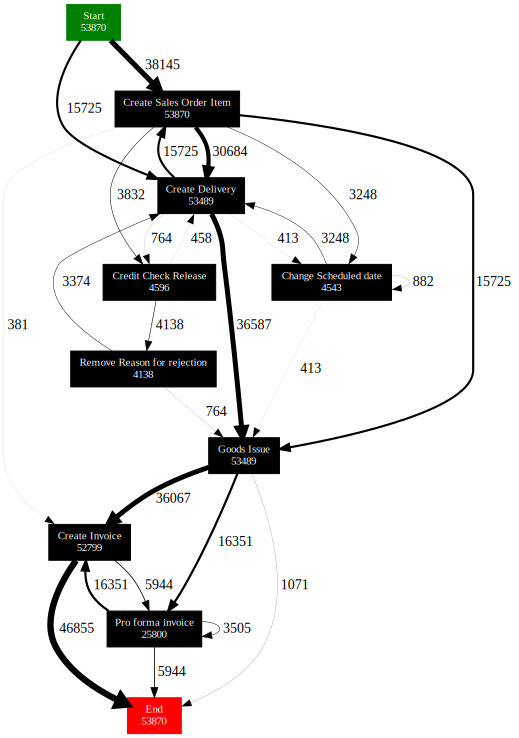

In [27]:
g = graphviz.Digraph('neato', format='png', encoding='utf8',
            filename='2_way_match', node_attr={'color': 'black', 'style': 'filled', 'fontcolor':'white','fontsize':'11'}, 
                     edge_attr={'weight': '1'})
g.attr('node', shape='box')
g.attr(rankdir='TB')
# h.attr(nodesep='0.1')
g.attr(size='7.75,10.25')

max_node = 5
max_case_id = proces_2_way['Weight'].max()

# create all the possible nodes first
# you can modify the `label` 

for index, row in start_act.iterrows():
    g.node(row['Start'],label=row['Start'] + '\n '+ str(start_act[start_act['Start'] == row['Start']]['Weight'].sum()), _attributes={'color':'green', 'fontcolor':'white'})
    g.node(row['First Activity'],label=row['First Activity'] + '\n '+ str(start_act[start_act['First Activity'] == row['First Activity']]['Weight'].sum()))

for index, row in start_act.iterrows():
    starrt, firstact, weight = [str(i) for i in row]
    g.edge(str(row["Start"]), str(row["First Activity"]), label="  " + weight, penwidth=str(int(row["Weight"])/max_case_id*max_node))

######################################################

for index, row in proces_2_way.iterrows():
    g.node(row['startEvent'],label=row['startEvent'] + '\n '+ str(process_count[process_count['ACTIVITY_EN'] == row['startEvent']]['COUNT'].sum()))
    g.node(row['endEvent'],label=row['endEvent'] + '\n '+ str(process_count[process_count['ACTIVITY_EN'] == row['endEvent']]['COUNT'].sum()))

for index, row in proces_2_way.iterrows():
    startevent, endevent, count = [str(i) for i in row]
    g.edge(str(row["startEvent"]), str(row["endEvent"]), label= "  " + count, penwidth=str(int(row["Weight"])/max_case_id*max_node))

######################################################

for index, row in end_act.iterrows():
    g.node(row['Last Activity'],label=row['Last Activity'] + '\n '+ str(process_count[process_count['ACTIVITY_EN'] == row['Last Activity']]['COUNT'].sum()))
    g.node(row['End'],label=row['End'] + '\n '+ str(end_act[end_act['End'] == row['End']]['Weight'].sum()),  _attributes={'color':'red', 'fontcolor':'white'})

for index, row in end_act.iterrows():
    lastact, endact, weight = [str(i) for i in row]
    g.edge(str(row["Last Activity"]), str(row["End"]), label= "  " + weight, penwidth=str(int(row["Weight"])/max_case_id*max_node))

######################################################

# g.view()
g

In [32]:
# variants_test = final_df.copy()
# variants_test = variants_test[variants_test['Variants'] == 1].reset_index()
# variants_test

,index,_CASE_KEY,ACTIVITY_EN,EVENTTIME,USER_TYPE,YEAR,COUNT,new_hgh,Variants
0,0,140449,Create Sales Order Item,2009-01-02 03:10:00,B,2009,1,True,1
1,1,140449,Create Delivery,2009-01-02 03:30:00,B,2009,2,True,1
2,2,140449,Goods Issue,2009-01-02 04:30:00,B,2009,3,True,1
3,3,140449,Create Invoice,2009-01-02 11:07:00,B,2009,4,True,1
4,12,140502,Create Sales Order Item,2009-01-05 03:00:00,B,2009,1,True,1
...,...,...,...,...,...,...,...,...,...
57559,252196,1089298,Create Invoice,2010-01-21 14:01:00,B,2010,4,True,1
57560,252265,1089553,Create Sales Order Item,2009-12-29 10:36:00,B,2009,1,True,1
57561,252266,1089553,Create Delivery,2010-01-14 03:36:00,B,2010,2,True,1
57562,252267,1089553,Goods Issue,2010-01-14 04:36:00,B,2010,3,True,1


In [33]:
# variants_test_1 = pd.pivot_table(variants_test, values ='_CASE_KEY', index=['Variants'],columns=['ACTIVITY_EN'], aggfunc='count')
# variants_test_1 = variants_test_1.reset_index()
# variants_test_1

ACTIVITY_EN,Variants,Create Delivery,Create Invoice,Create Sales Order Item,Goods Issue
0,1,14391,14391,14391,14391


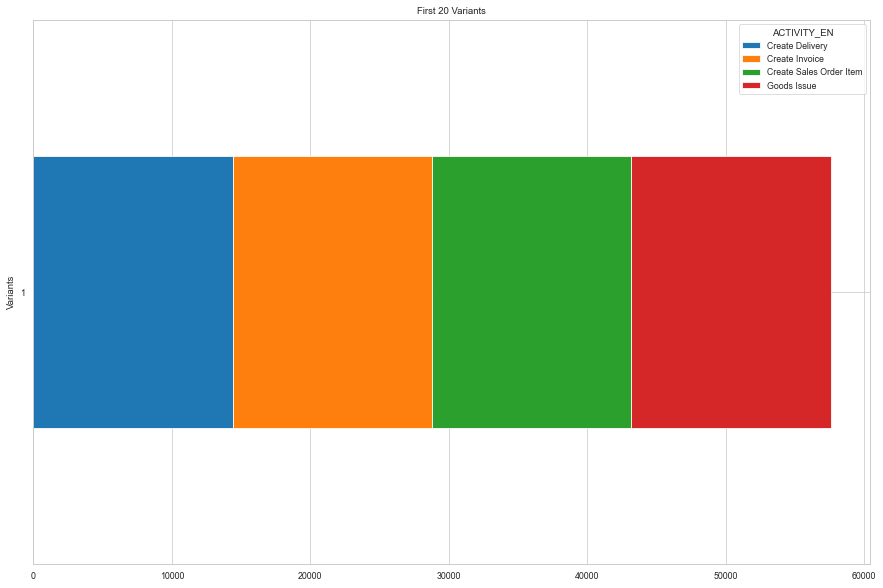

In [34]:
# # ax = variants_test_1.plot.barh(stacked=True)
# sns.set_style('whitegrid')
# sns.set_context('paper')
# # fig, ax = plt.subplots(figsize=(15, 10))
# ax = variants_test_1.plot.barh(x='Variants',title="First 20 Variants", legend=True, figsize=(15,10), stacked=True)      
# ax.invert_yaxis()
